# Projet : Détection d'Anomalies dans le Trafic Réseau
## Realise par : Ismail Jirari ET Abderrahmane  Benhayoun 
L'objectif de ce projet est de détecter des anomalies dans le trafic réseau en utilisant des modèles de mélange gaussien (GMM). 
Les GMM sont des outils puissants pour la détection d'anomalies non supervisée, particulièrement adaptés pour identifier les connexions réseau malveillantes dans des ensembles de données comme KDDCup99.


## Définition

### Modèles de Mélange Gaussien (GMM) :
Un modèle de mélange gaussien (GMM) est une méthode statistique utilisée pour modéliser la distribution des données en supposant que les données sont générées à partir d'un mélange de plusieurs distributions gaussiennes. Chaque composante gaussienne du mélange est caractérisée par sa moyenne et sa covariance. Les GMM sont couramment utilisés pour la classification, la détection d'anomalies et le clustering non supervisé.

### Trafic Réseau :
Le trafic réseau fait référence à la quantité de données circulant sur un réseau informatique à un moment donné. Il comprend toutes les communications de données, y compris les requêtes et réponses entre les clients et les serveurs, les transferts de fichiers, les courriels, la navigation web, etc. L'analyse du trafic réseau est essentielle pour la gestion de la performance, la sécurité et la détection d'anomalies dans les réseaux.

Ce fichier CSV semble contenir des données de trafic réseau, probablement utilisées pour la détection d'anomalies ou d'intrusions. Chaque ligne représente une connexion réseau avec plusieurs caractéristiques. Voici une explication des colonnes :

- **duration** : Durée de la connexion en secondes.
- **protocol_type** : Type de protocole (e.g., TCP, UDP, ICMP).
- **service** : Service réseau utilisé (e.g., HTTP, FTP, SMTP).
- **flag** : État de la connexion (e.g., SF pour "successful connection").
- **src_bytes** : Nombre de bytes envoyés par la source.
- **dst_bytes** : Nombre de bytes reçus par la destination.
- **land** : Indicateur si la connexion est vers la même machine (0 ou 1).
- **wrong_fragment** : Nombre de fragments incorrects.
- **urgent** : Nombre de paquets urgents.
- **hot** : Nombre d'actions "chaudes" (e.g., accès à des fichiers système).
- **num_failed_logins** : Nombre de tentatives de connexion échouées.
- **logged_in** : Indicateur si l'utilisateur est connecté (0 ou 1).
- **lnum_compromised** : Nombre de conditions compromises.
- **lroot_shell** : Indicateur si un shell root a été obtenu (0 ou 1).
- **lsu_attempted** : Nombre de tentatives de commande "su".
- **lnum_root** : Nombre de processus root.
- **lnum_file_creations** : Nombre de créations de fichiers.
- **lnum_shells** : Nombre de shells ouverts.
- **lnum_access_files** : Nombre d'accès à des fichiers.
- **lnum_outbound_cmds** : Nombre de commandes sortantes.
- **is_host_login** : Indicateur si c'est une connexion de l'hôte (0 ou 1).
- **is_guest_login** : Indicateur si c'est une connexion d'invité (0 ou 1).
- **count** : Nombre de connexions vers la même destination dans les 2 secondes.
- **srv_count** : Nombre de connexions vers le même service dans les 2 secondes.
- **serror_rate** : Taux de connexions ayant des erreurs SYN.
- **srv_serror_rate** : Taux de connexions au même service ayant des erreurs SYN.
- **rerror_rate** : Taux de connexions ayant des erreurs RST.
- **srv_rerror_rate** : Taux de connexions au même service ayant des erreurs RST.
- **same_srv_rate** : Taux de connexions au même service.
- **diff_srv_rate** : Taux de connexions à des services différents.
- **srv_diff_host_rate** : Taux de connexions au même service mais à des hôtes différents.
- **dst_host_count** : Nombre de connexions vers la même destination.
- **dst_host_srv_count** : Nombre de connexions vers le même service à la même destination.
- **dst_host_same_srv_rate** : Taux de connexions vers le même service à la même destination.
- **dst_host_diff_srv_rate** : Taux de connexions vers des services différents à la même destination.
- **dst_host_same_src_port_rate** : Taux de connexions vers la même destination et le même port source.
- **dst_host_srv_diff_host_rate** : Taux de connexions vers le même service mais à des hôtes différents.
- **dst_host_serror_rate** : Taux de connexions vers la même destination ayant des erreurs SYN.
- **dst_host_srv_serror_rate** : Taux de connexions vers le même service à la même destination ayant des erreurs SYN.
- **dst_host_rerror_rate** : Taux de connexions vers la même destination ayant des erreurs RST.
- **dst_host_srv_rerror_rate** : Taux de connexions vers le même service à la même destination ayant des erreurs RST.
- **label** : Étiquette indiquant si la connexion est normale ou une attaque.

Ces caractéristiques sont souvent utilisées dans les algorithmes de machine learning pour détecter des anomalies dans le trafic réseau.

## 1. Pré-requis

Assurez-vous d'avoir les bibliothèques suivantes installées :
- **scikit-learn** : Pour les modèles de GMM.
- **pandas** : Pour le traitement des données.
- **numpy** : Pour les calculs numériques.
- **matplotlib** : Pour la visualisation.




## 2. Charger et Prétraiter les Données

### Chargement des données :
Chargez le fichier `KDDCup99.csv` à l'aide de `pandas` et vérifiez la structure des données.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer

# Charger les données
data = pd.read_csv('KDDCup99.csv')


In [16]:
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


### Nettoyage des données :
Gérez les valeurs manquantes et encodez les colonnes catégoriques (e.g., `protocol_type`, `service`, `flag`).


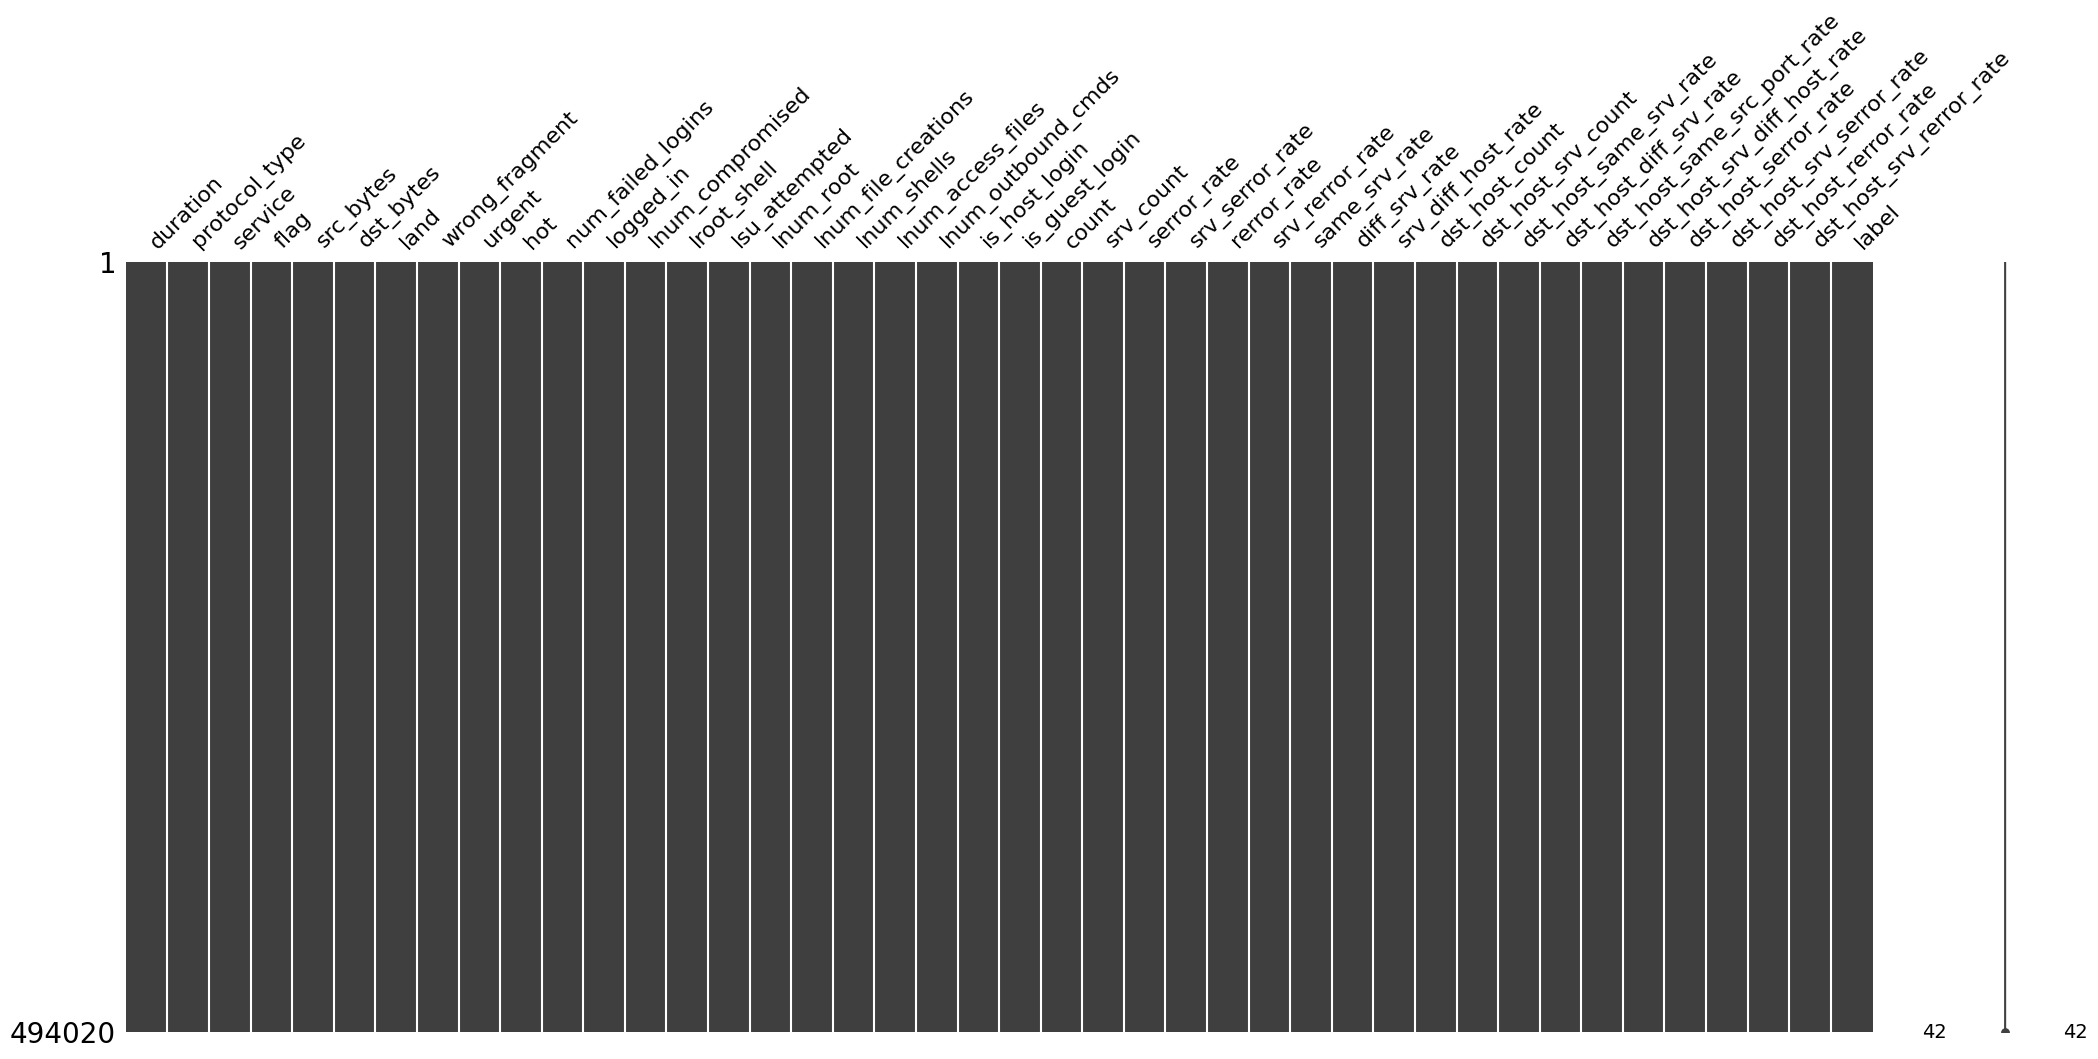

In [17]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(data)
plt.show()


In [31]:
# Compter les valeurs manquantes pour chaque colonne
missing_counts = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_counts)


Valeurs manquantes par colonne :
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_

In [32]:
# Supprimer les lignes avec des valeurs manquantes
data_cleaned_rows = data.dropna()
print("Données après suppression des lignes avec valeurs manquantes :")
print(data_cleaned_rows.head())

# Supprimer les colonnes avec des valeurs manquantes
data_cleaned_columns = data.dropna(axis=1)
print("Données après suppression des colonnes avec valeurs manquantes :")
print(data_cleaned_columns.head())


Données après suppression des lignes avec valeurs manquantes :
   duration  protocol_type service flag  src_bytes  dst_bytes  land   
0         0              1    http   SF        181       5450     0  \
1         0              1    http   SF        239        486     0   
2         0              1    http   SF        235       1337     0   
3         0              1    http   SF        219       1337     0   
4         0              1    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count   
0               0       0    0  ...                   9  \
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate   
0                     1.0                     0.0  \
1                     1.0                     0.0

In [33]:
# Imputation par la moyenne
data_mean_imputed = data.copy()
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data_mean_imputed[column] = data[column].fillna(data[column].mean())
print("Données après imputation par la moyenne :")
print(data_mean_imputed.head())

# Imputation par la médiane
data_median_imputed = data.copy()
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data_median_imputed[column] = data[column].fillna(data[column].median())
print("Données après imputation par la médiane :")
print(data_median_imputed.head())

# Imputation par le mode
data_mode_imputed = data.copy()
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data_mode_imputed[column] = data[column].fillna(data[column].mode()[0])
print("Données après imputation par le mode :")
print(data_mode_imputed.head())


Données après imputation par la moyenne :
   duration  protocol_type service flag  src_bytes  dst_bytes  land   
0         0              1    http   SF        181       5450     0  \
1         0              1    http   SF        239        486     0   
2         0              1    http   SF        235       1337     0   
3         0              1    http   SF        219       1337     0   
4         0              1    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count   
0               0       0    0  ...                   9  \
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate   
0                     1.0                     0.0  \
1                     1.0                     0.0   
2                

In [34]:
# Séparer les colonnes numériques uniquement
data_numeric = data.select_dtypes(include=[np.number])

# Appliquer l'imputation KNN uniquement sur les colonnes numériques
imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Réintégrer les colonnes non numériques si nécessaire
data_final = pd.concat([data_knn_imputed, data.select_dtypes(exclude=[np.number])], axis=1)

print("Données après imputation avec KNN :")
print(data_final.head())


Données après imputation avec KNN :
   duration  protocol_type  src_bytes  dst_bytes  land  wrong_fragment   
0       0.0            1.0      181.0     5450.0   0.0             0.0  \
1       0.0            1.0      239.0      486.0   0.0             0.0   
2       0.0            1.0      235.0     1337.0   0.0             0.0   
3       0.0            1.0      219.0     1337.0   0.0             0.0   
4       0.0            1.0      217.0     2032.0   0.0             0.0   

   urgent  hot  num_failed_logins  logged_in  ...  dst_host_diff_srv_rate   
0     0.0  0.0                0.0        1.0  ...                     0.0  \
1     0.0  0.0                0.0        1.0  ...                     0.0   
2     0.0  0.0                0.0        1.0  ...                     0.0   
3     0.0  0.0                0.0        1.0  ...                     0.0   
4     0.0  0.0                0.0        1.0  ...                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_r

In [38]:
# Vérifier qu'il n'y a plus de valeurs manquantes
print("Valeurs manquantes après traitement :")
print(data_knn_imputed.isnull().sum())


Valeurs manquantes après traitement :
duration                       0
protocol_type                  0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_h

In [40]:
# Sauvegarder les données traitées dans un nouveau fichier CSV
data_knn_imputed.to_csv("KDDCup99cleaned.csv", index=False)
print("Les données traitées ont été sauvegardées sous le nom 'KDDCup99cleaned.csv'.")


Les données traitées ont été sauvegardées sous le nom 'KDDCup99cleaned.csv'.


In [41]:
from sklearn.preprocessing import LabelEncoder

# Exemple pour encoder une colonne
encoder = LabelEncoder()
data['protocol_type'] = encoder.fit_transform(data['protocol_type'])


### Normalisation :
Normalisez les colonnes numériques pour améliorer la convergence du modèle.


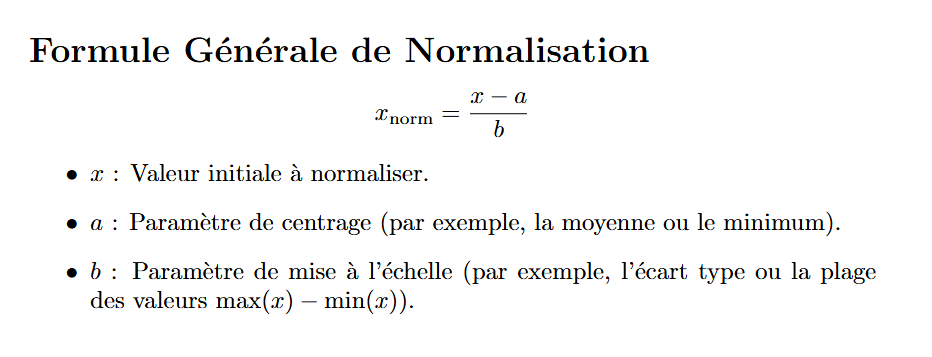

## a l'aide de la formule mathematique 

In [42]:
# Calculer le mode pour chaque colonne numérique
mode = data.select_dtypes(include=['float64', 'int64']).mode().iloc[0]

# Soustraire le mode (centrer)
data_centered_mode = data.select_dtypes(include=['float64', 'int64']) - mode

# Calculer l'écart-type de chaque colonne
std_dev = data.select_dtypes(include=['float64', 'int64']).std()

# Normaliser (diviser par l'écart-type)
data_normalized = data_centered_mode / std_dev

# Afficher les données centrées et normalisées
print(data_normalized)


        duration  protocol_type  src_bytes  dst_bytes  land  wrong_fragment   
0            0.0       1.737301  -0.000861   0.164951   0.0             0.0  \
1            0.0       1.737301  -0.000802   0.014709   0.0             0.0   
2            0.0       1.737301  -0.000807   0.040466   0.0             0.0   
3            0.0       1.737301  -0.000823   0.040466   0.0             0.0   
4            0.0       1.737301  -0.000825   0.061501   0.0             0.0   
...          ...            ...        ...        ...   ...             ...   
494015       0.0       1.737301  -0.000731   0.056931   0.0             0.0   
494016       0.0       1.737301  -0.000759   0.069189   0.0             0.0   
494017       0.0       1.737301  -0.000839   0.036320   0.0             0.0   
494018       0.0       1.737301  -0.000750   0.036320   0.0             0.0   
494019       0.0       1.737301  -0.000823   0.037349   0.0             0.0   

        urgent  hot  num_failed_logins  logged_in  

## a l'aide de la biblioteque

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))
print(data_scaled)

[[0.00000000e+00 5.00000000e-01 2.61041764e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 3.44690506e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 3.38921627e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 5.00000000e-01 2.92770597e-07 ... 1.00000000e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 4.19685930e-07 ... 1.00000000e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 3.15846112e-07 ... 1.00000000e-02
  0.00000000e+00 0.00000000e+00]]


## 3. Entraîner le Modèle GMM

### Initialisation :
Définissez un modèle GMM avec un nombre optimal de composantes.


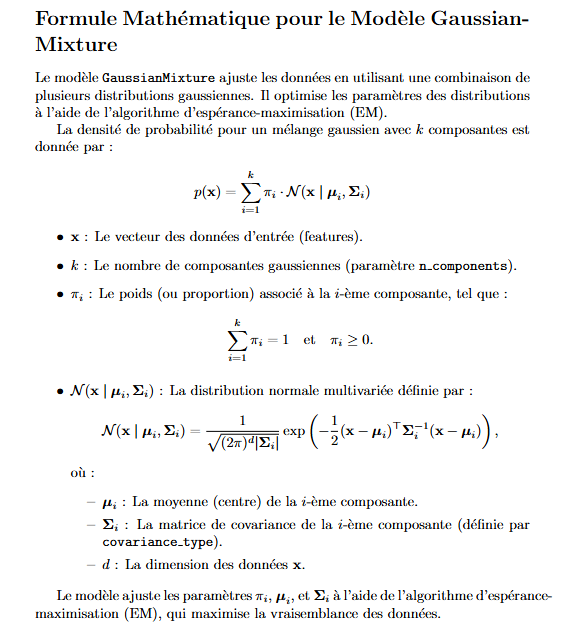

## a l'aide des fonctions mathematiques

In [44]:
import numpy as np
from scipy.stats import multivariate_normal

# Fonction pour initialiser les paramètres du modèle GMM
def initialize_parameters(X, K):
    n, d = X.shape
    # Initialisation des poids (pi_k)
    pi = np.ones(K) / K
    # Initialisation des moyennes (mu_k)
    mu = X[np.random.choice(n, K, False)]
    # Initialisation des matrices de covariance (Sigma_k)
    sigma = np.array([np.cov(X.T) for _ in range(K)])
    return pi, mu, sigma

# Fonction EM pour le modèle de mélange gaussien
def fit_gmm(X, K, max_iter=100, tol=1e-6):
    n, d = X.shape
    pi, mu, sigma = initialize_parameters(X, K)
    
    for i in range(max_iter):
        # E-step : calcul des responsabilités (gamma_ik)
        gamma = np.zeros((n, K))
        for k in range(K):
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mu[k], sigma[k])
        
        # Normaliser pour obtenir des probabilités
        gamma /= gamma.sum(axis=1)[:, np.newaxis]

        # M-step : mise à jour des paramètres
        N_k = gamma.sum(axis=0)
        
        # Mise à jour des poids (pi_k)
        pi = N_k / n
        
        # Mise à jour des moyennes (mu_k)
        mu = (gamma.T @ X) / N_k[:, np.newaxis]
        
        # Mise à jour des covariances (Sigma_k)
        for k in range(K):
            diff = X - mu[k]
            sigma[k] = (gamma[:, k] * diff.T) @ diff / N_k[k]
        
        # Calcul de la log-vraisemblance pour vérifier la convergence
        log_likelihood = np.sum(np.log(gamma.sum(axis=1)))
        
        # Convergence
        if i > 0 and np.abs(log_likelihood - prev_log_likelihood) < tol:
            print(f'Convergence atteinte après {i} itérations.')
            break
        
        prev_log_likelihood = log_likelihood
    
    return pi, mu, sigma

# Exemple d'utilisation avec des données simulées
np.random.seed(42)
X = np.vstack([
    np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 200),
    np.random.multivariate_normal([5, 5], [[1, -0.5], [-0.5, 1]], 200)
])

# Apprentissage du modèle GMM avec 2 composantes
K = 2
pi, mu, sigma = fit_gmm(X, K)

print("Poids des composantes (pi):", pi)
print("Moyennes des composantes (mu):", mu)
print("Matrices de covariance des composantes (sigma):", sigma)


Convergence atteinte après 1 itérations.
Poids des composantes (pi): [0.54343548 0.45656452]
Moyennes des composantes (mu): [[2.02613022 2.50389684]
 [3.0857008  2.44422014]]
Matrices de covariance des composantes (sigma): [[[6.17492219 6.27396086]
  [6.27396086 8.01817156]]

 [[8.22378871 6.17480423]
  [6.17480423 5.85496608]]]


## a l'aide de la bibliotheques directement 

In [45]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
print(gmm)

GaussianMixture(n_components=2, random_state=42)


### Entraînement :
Ajustez le modèle sur les données normalisées.


In [47]:
gmm.fit(data_scaled)


GaussianMixture(n_components=2, random_state=42)

### Détection d'anomalies :
Utilisez les scores de vraisemblance pour identifier des anomalies.


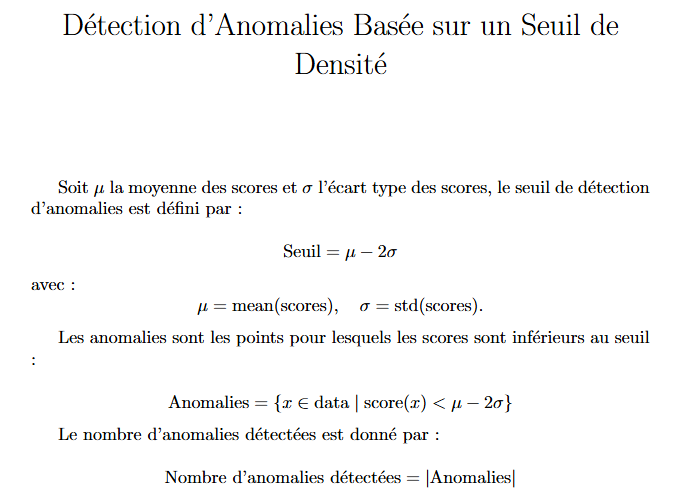

In [48]:
scores = gmm.score_samples(data_scaled)
threshold = scores.mean() - 2 * scores.std()  # Définir un seuil basé sur la distribution
anomalies = data[scores < threshold]
print(f"Nombre d'anomalies détectées : {len(anomalies)}")


Nombre d'anomalies détectées : 432


## 4. Visualisation des Anomalies

### Visualisation 2D :
Observez la répartition des anomalies en utilisant `src_bytes` vs `dst_bytes`.


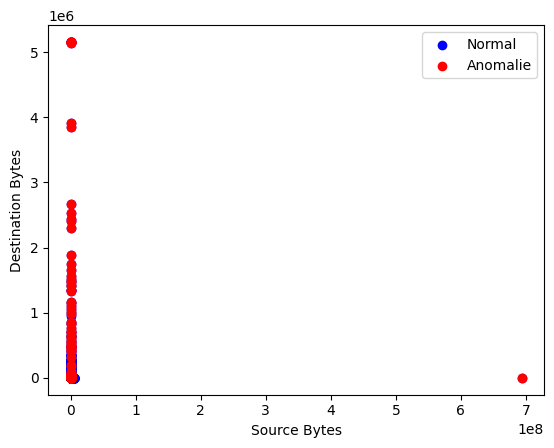

In [49]:
import matplotlib.pyplot as plt

plt.scatter(data['src_bytes'], data['dst_bytes'], c='blue', label='Normal')
plt.scatter(anomalies['src_bytes'], anomalies['dst_bytes'], c='red', label='Anomalie')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.legend()
plt.show()
 

### Visualisation en 3D :
Ajoutez une dimension supplémentaire comme `duration`.


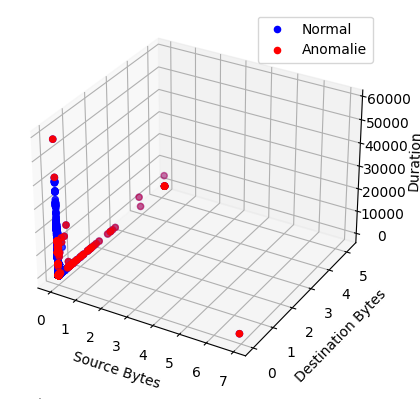

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['src_bytes'], data['dst_bytes'], data['duration'], c='blue', label='Normal')
ax.scatter(anomalies['src_bytes'], anomalies['dst_bytes'], anomalies['duration'], c='red', label='Anomalie')
ax.set_xlabel('Source Bytes')
ax.set_ylabel('Destination Bytes')
ax.set_zlabel('Duration')
plt.legend()
plt.show()


### Valeur Ajoutée du Projet

Ce projet apporte plusieurs valeurs ajoutées :

- **Détection Précoce des Menaces** : En identifiant les anomalies dans le trafic réseau, ce projet permet de détecter précocement des activités malveillantes, réduisant ainsi les risques de cyberattaques.
- **Amélioration de la Sécurité Réseau** : En surveillant continuellement le trafic réseau et en détectant les anomalies, les administrateurs réseau peuvent renforcer la sécurité de leur infrastructure.
- **Automatisation de la Surveillance** : L'utilisation de modèles de machine learning comme les GMM permet d'automatiser la surveillance du réseau, réduisant ainsi la charge de travail des équipes de sécurité.
- **Adaptabilité** : Le modèle GMM peut être ajusté et amélioré en fonction des nouvelles données, rendant le système de détection d'anomalies adaptable aux évolutions du trafic réseau.
- **Visualisation et Analyse** : Les visualisations 2D et 3D des anomalies permettent une analyse rapide et intuitive des données, facilitant la prise de décision.

En somme, ce projet fournit un cadre robuste pour la détection d'anomalies dans le trafic réseau, contribuant ainsi à la sécurité et à la résilience des systèmes informatiques.